In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fatmanur12/electric-vehicle-population")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tanto\.cache\kagglehub\datasets\fatmanur12\electric-vehicle-population\versions\1


In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import xgboost as xgb
from scipy.stats import norm
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
%matplotlib inline

In [3]:
path=path+'\EV_Population.csv'

In [4]:
df = pd.read_csv(path)

In [5]:
df1 = df.copy()

In [6]:
df

,State,Model Year,Make,Electric Vehicle Type,Electric Range,Base MSRP,Legislative District,CAFV Eligibility Simple
0,WA,2020,TESLA,BEV,266,0,46.0,Eligible
1,WA,2024,BMW,PHEV,39,0,46.0,Eligible
2,WA,2024,BMW,PHEV,39,0,43.0,Eligible
3,WA,2018,TESLA,BEV,215,0,1.0,Eligible
4,WA,2012,CHEVROLET,PHEV,35,0,35.0,Eligible
...,...,...,...,...,...,...,...,...
92671,WA,2015,NISSAN,BEV,84,0,30.0,Eligible
92672,WA,2018,TESLA,BEV,215,0,1.0,Eligible
92673,WA,2019,TESLA,BEV,220,0,44.0,Eligible
92674,WA,2022,CHRYSLER,PHEV,32,0,45.0,Eligible


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92676 entries, 0 to 92675
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   State                    92676 non-null  object 
 1   Model Year               92676 non-null  int64  
 2   Make                     92676 non-null  object 
 3   Electric Vehicle Type    92676 non-null  object 
 4   Electric Range           92676 non-null  int64  
 5   Base MSRP                92676 non-null  int64  
 6   Legislative District     92676 non-null  float64
 7   CAFV Eligibility Simple  92676 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 5.7+ MB


In [8]:
#description 
df.describe().round(2)

,Model Year,Electric Range,Base MSRP,Legislative District
count,92676.00,92676.00,92676.00,92676.00
mean,2018.91,115.51,2018.56,28.51
std,3.28,98.82,11390.58,14.65
min,1999.00,6.00,0.00,1.00
25%,2017.00,30.00,0.00,17.00
50%,2019.00,73.00,0.00,32.00
75%,2021.00,215.00,0.00,41.00
max,2025.00,337.00,845000.00,49.00


In [9]:
alpha_df = df.select_dtypes(exclude=[np.number])

In [10]:
alpha_df.describe()

,State,Make,Electric Vehicle Type,CAFV Eligibility Simple
count,92676,92676,92676,92676
unique,1,36,2,2
top,WA,TESLA,BEV,Eligible
freq,92676,25228,46798,70855


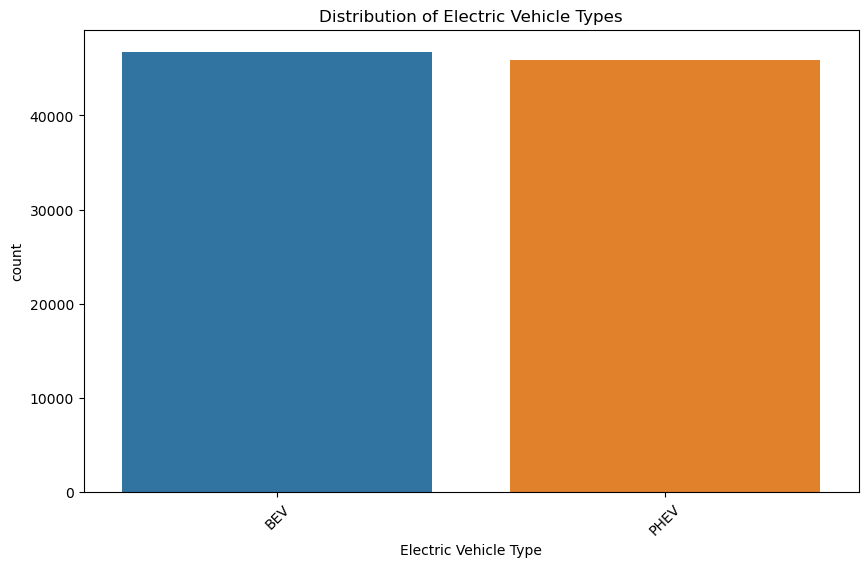

In [11]:
# Plot the distribution of electric vehicle types
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Electric Vehicle Type', order=df['Electric Vehicle Type'].value_counts().index)
plt.title('Distribution of Electric Vehicle Types')
plt.xticks(rotation=45)
plt.show()

C:\Users\tanto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


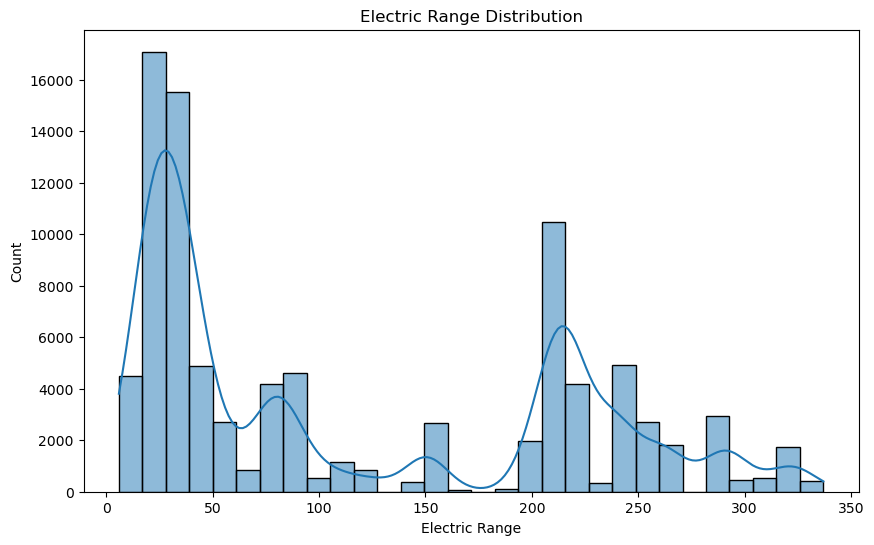

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Electric Range'], bins=30, kde=True)
plt.title('Electric Range Distribution')
plt.show()


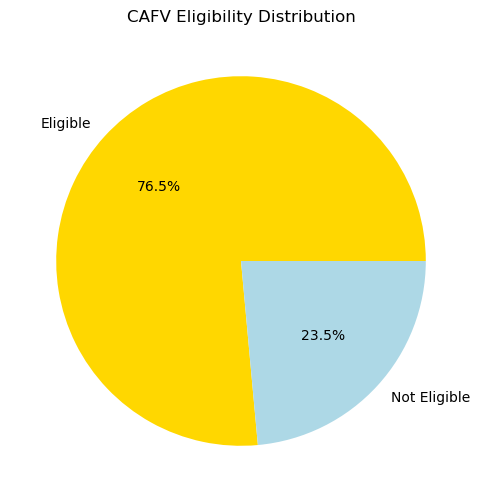

In [13]:
# Distribution of CAFV Eligibility
plt.figure(figsize=(10, 6))
df['CAFV Eligibility Simple'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gold', 'lightblue'])
plt.title('CAFV Eligibility Distribution')
plt.ylabel('')
plt.show()

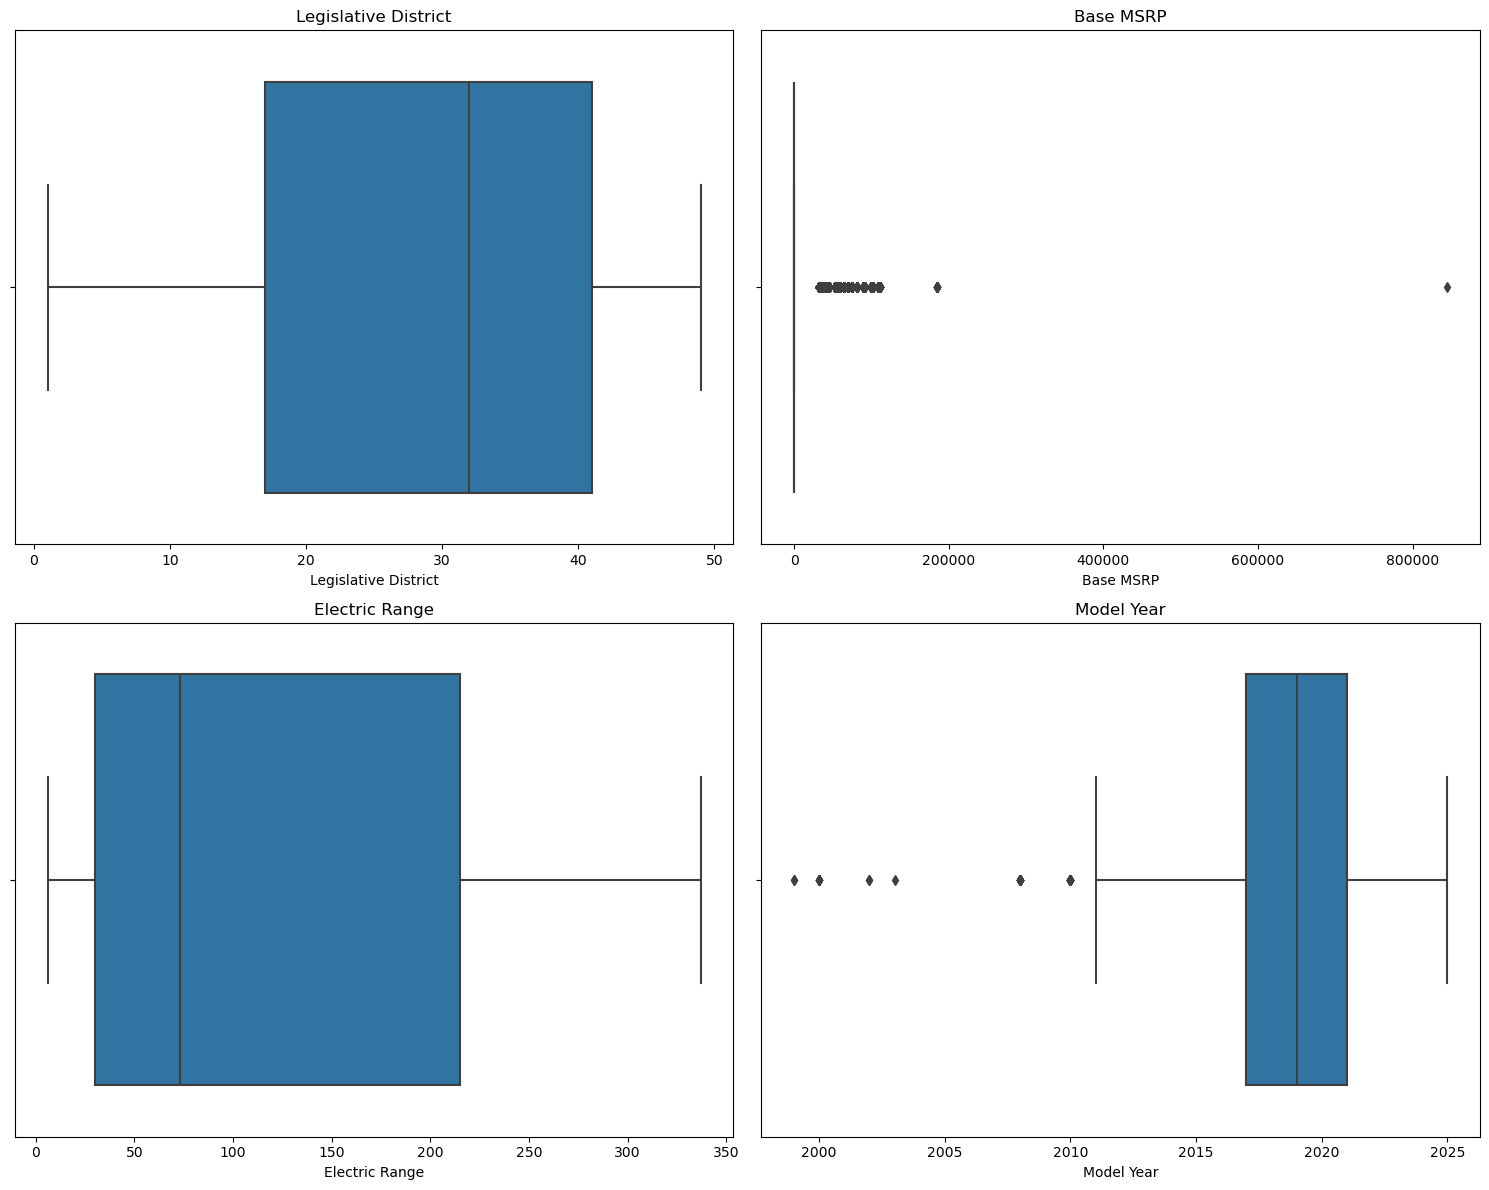

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

sns.boxplot(x=df['Legislative District'], ax=axes[0, 0])
axes[0, 0].set_title('Legislative District')

sns.boxplot(x=df['Base MSRP'], ax=axes[0, 1])
axes[0, 1].set_title('Base MSRP')

sns.boxplot(x=df['Electric Range'], ax=axes[1, 0])
axes[1, 0].set_title('Electric Range')

sns.boxplot(x=df['Model Year'], ax=axes[1, 1])
axes[1, 1].set_title('Model Year')

plt.tight_layout()
plt.show()

C:\Users\tanto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\tanto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

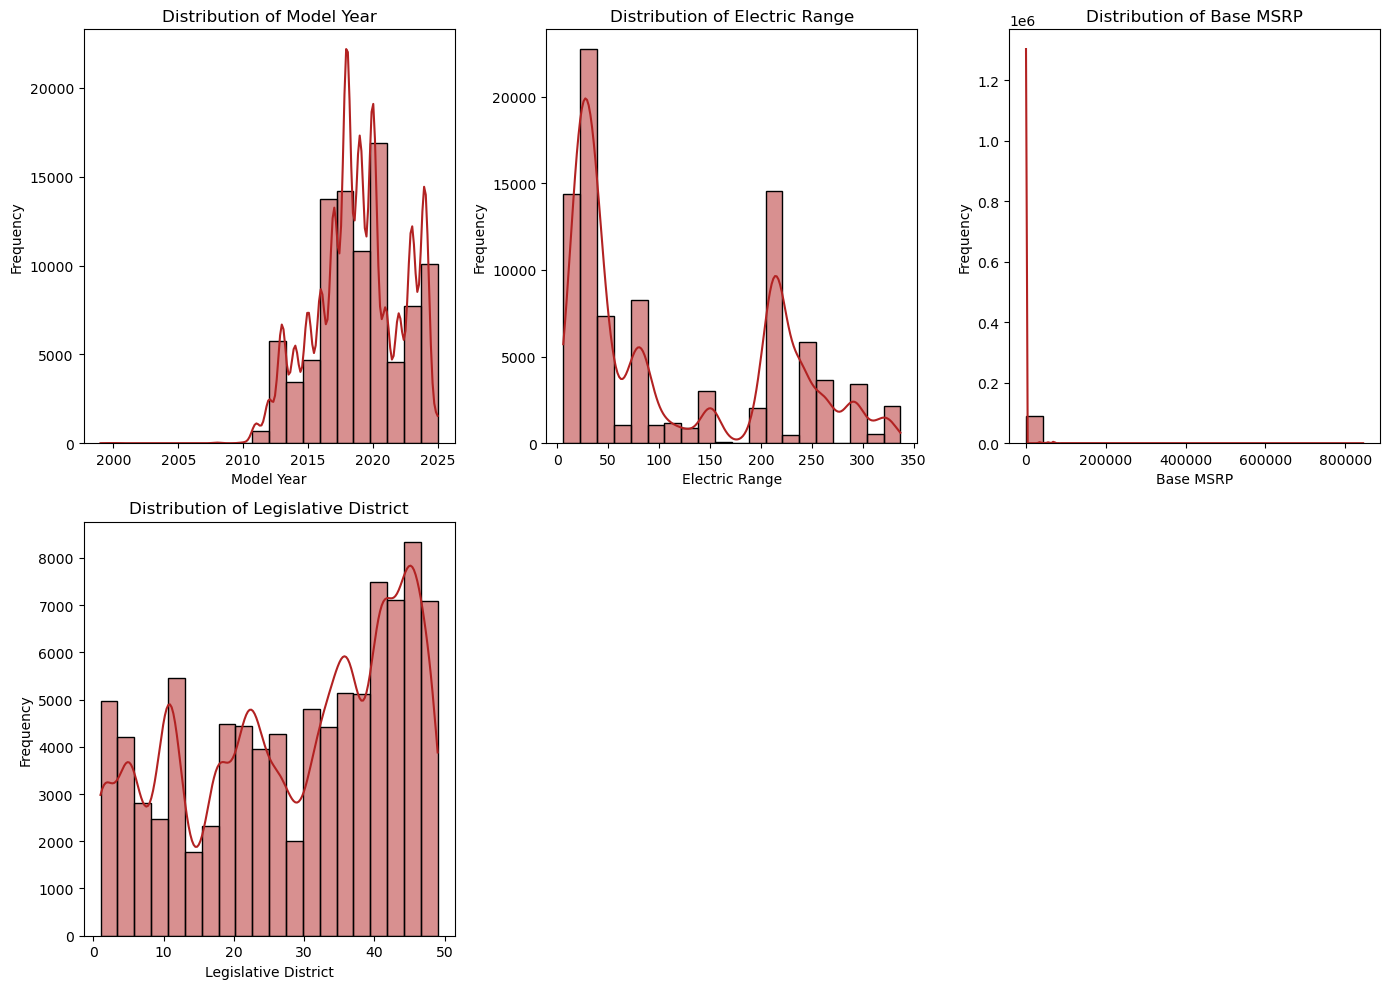

In [15]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(len(numeric_cols) // 3 + 1, 3, i)
    sns.histplot(df[col], kde=True, bins=20, color='firebrick')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

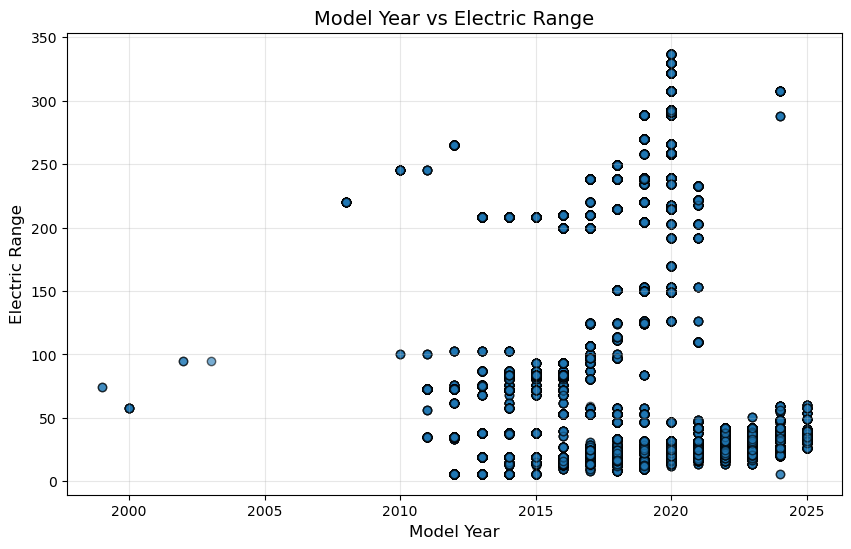

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Model Year"], df["Electric Range"], alpha=0.6, edgecolor='k')
plt.title("Model Year vs Electric Range", fontsize=14)
plt.xlabel("Model Year", fontsize=12)
plt.ylabel("Electric Range", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

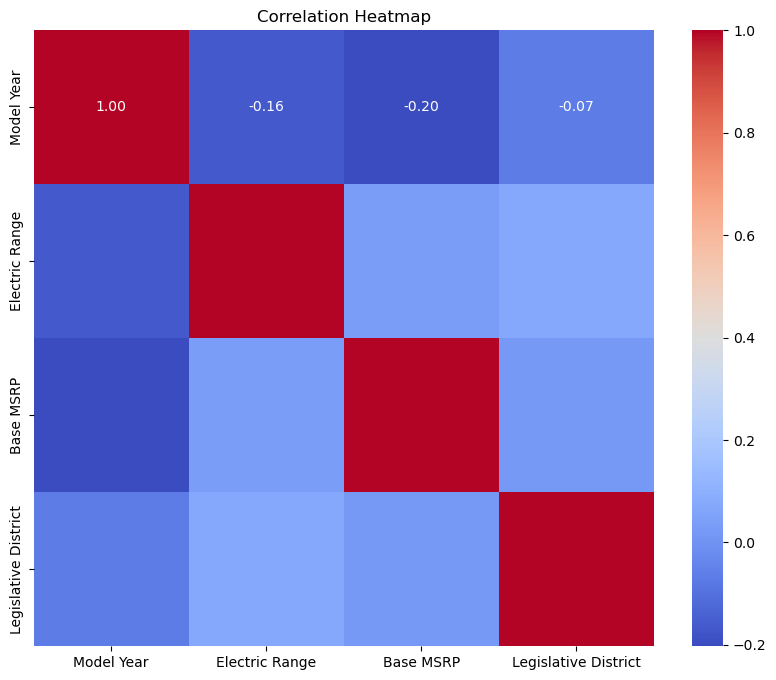

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [18]:
df.duplicated().sum()

81338

In [19]:
df = df.drop_duplicates()

In [20]:
encoder = LabelEncoder()

label_mappings = {}

for col in df.select_dtypes('object'):
    df[col] = encoder.fit_transform(df[col])
    label_mappings[col] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

for col, mapping in label_mappings.items():
    print(f"Column: {col}")
    for label, code in mapping.items():
        print(f"{code} -> {label}")
    print()

Column: State
0 -> WA

Column: Make
0 -> ALFA ROMEO
1 -> AUDI
2 -> AZURE DYNAMICS
3 -> BENTLEY
4 -> BMW
5 -> CADILLAC
6 -> CHEVROLET
7 -> CHRYSLER
8 -> DODGE
9 -> FIAT
10 -> FISKER
11 -> FORD
12 -> HONDA
13 -> HYUNDAI
14 -> JAGUAR
15 -> JEEP
16 -> KIA
17 -> LAMBORGHINI
18 -> LAND ROVER
19 -> LEXUS
20 -> LINCOLN
21 -> MAZDA
22 -> MERCEDES-BENZ
23 -> MINI
24 -> MITSUBISHI
25 -> NISSAN
26 -> POLESTAR
27 -> PORSCHE
28 -> SMART
29 -> SUBARU
30 -> TESLA
31 -> TH!NK
32 -> TOYOTA
33 -> VOLKSWAGEN
34 -> VOLVO
35 -> WHEEGO ELECTRIC CARS

Column: Electric Vehicle Type
0 -> BEV
1 -> PHEV

Column: CAFV Eligibility Simple
0 -> Eligible
1 -> Not Eligible



C:\Users\tanto\AppData\Local\Temp\ipykernel_20672\2295089088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
C:\Users\tanto\AppData\Local\Temp\ipykernel_20672\2295089088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = encoder.fit_transform(df[col])
C:\Users\tanto\AppData\Local\Temp\ipykernel_20672\2295089088.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop('Electric Vehicle Type',axis = 1)
y = df['Electric Vehicle Type']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(X_train.shape,X_test.shape)

(7936, 7) (3402, 7)


In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)

# Définition des paramètres du modèle
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'logloss',  
    'max_depth': 3,
    'eta': 0.1
}

# Validation croisée
cv_results = xgb.cv(
    params=params,
    dtrain=dtrain,
    num_boost_round=100,
    nfold=30,  # Nombre de plis
    metrics="auc",  # Mesure de performance
    early_stopping_rounds=10,  # Arrêt précoce si aucune amélioration
    seed=42
)

In [47]:
print(cv_results)
print(f"Best AUC: {cv_results['test-auc-mean'].min()}")

    train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
0         0.997481       0.000093       0.997432      0.002769
1         0.997481       0.000093       0.997432      0.002769
2         0.997482       0.000093       0.997432      0.002769
3         0.997719       0.000200       0.997526      0.002749
4         0.997831       0.000094       0.997764      0.002796
..             ...            ...            ...           ...
95        0.999990       0.000002       0.999985      0.000040
96        0.999991       0.000002       0.999985      0.000040
97        0.999991       0.000002       0.999985      0.000040
98        0.999991       0.000002       0.999985      0.000040
99        0.999992       0.000002       0.999987      0.000038

[100 rows x 4 columns]
Best AUC: 0.9974324308555437


In [49]:
cv_results?

Type:        DataFrame
String form:
train-auc-mean  train-auc-std  test-auc-mean  test-auc-std
           0         0.997481       0.000093  <...>   0.000040
           99        0.999992       0.000002       0.999987      0.000038
           
           [100 rows x 4 columns]
Length:      100
File:        c:\users\tanto\anaconda3\lib\site-packages\pandas\core\frame.py
Docstring:  
Two-dimensional, size-mutable, potentially heterogeneous tabular data.

Data structure also contains labeled axes (rows and columns).
Arithmetic operations align on both row and column labels. Can be
thought of as a dict-like container for Series objects. The primary
pandas data structure.

Parameters
----------
data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
    Dict can contain Series, arrays, constants, dataclass or list-like objects. If
    data is a dict, column order follows insertion-order. If a dict contains Series
    which have an index defined, it is aligned by its index. 

In [63]:
xgb_model = xgb.XGBClassifier(objective= 'binary:logistic',
    eval_metric= 'logloss',
    max_depth= 3,
    eta= 0.1)

In [ ]:
xgb_model.fit(X_train,y_train)

In [65]:
y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred)
xgb_accuracy

0.9994121105232217

In [25]:
df_new = pd.get_dummies(df1, columns=['Make', 'Electric Vehicle Type', 'CAFV Eligibility Simple'], drop_first=True)

In [26]:
df_new

,State,Model Year,Electric Range,Base MSRP,Legislative District,Make_AUDI,Make_AZURE DYNAMICS,Make_BENTLEY,Make_BMW,Make_CADILLAC,...,Make_SMART,Make_SUBARU,Make_TESLA,Make_TH!NK,Make_TOYOTA,Make_VOLKSWAGEN,Make_VOLVO,Make_WHEEGO ELECTRIC CARS,Electric Vehicle Type_PHEV,CAFV Eligibility Simple_Not Eligible
0,WA,2020,266,0,46.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,WA,2024,39,0,46.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
2,WA,2024,39,0,43.0,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
3,WA,2018,215,0,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,WA,2012,35,0,35.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92671,WA,2015,84,0,30.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
92672,WA,2018,215,0,1.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
92673,WA,2019,220,0,44.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
92674,WA,2022,32,0,45.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [66]:
X = df_new.drop(['CAFV Eligibility Simple_Not Eligible','State'], axis = 1)
y = df_new['CAFV Eligibility Simple_Not Eligible']

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=200, stratify=y )


In [68]:
y_test.value_counts()

CAFV Eligibility Simple_Not Eligible
False    21257
True      6546
Name: count, dtype: int64

In [69]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [70]:
model = LogisticRegression(max_iter=1000, random_state=42, class_weight='balanced')

param_xgb = {
    'C': [0.1, 0.2],
    'penalty': ['l1','l2']
}

grid_search_ = GridSearchCV(model, param_xgb, cv=10)

grid_search_.fit(X_train_scaled, y_train)
print(grid_search__xgb.best_params_)
best_gs = grid_search_.best_estimator_

y_pred = best_gs.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')

print('Accuracy Score = ', round(accuracy, 4))
print('F1 Score = ', round(f1, 4))

C:\Users\tanto\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\tanto\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\tanto\anaconda3\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\tanto\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1193, in fit
    solver = _

{'C': 0.2, 'penalty': 'l2'}
Accuracy Score =  0.9953
F1 Score =  0.9953


"Solver lbfgs supports only 'l2' or None penalties, got l1 penalty." erreur tout à fait normal du moment. l1 avait été ajouté dans le gridSearch pour tester avec d'autres optimiseurs.

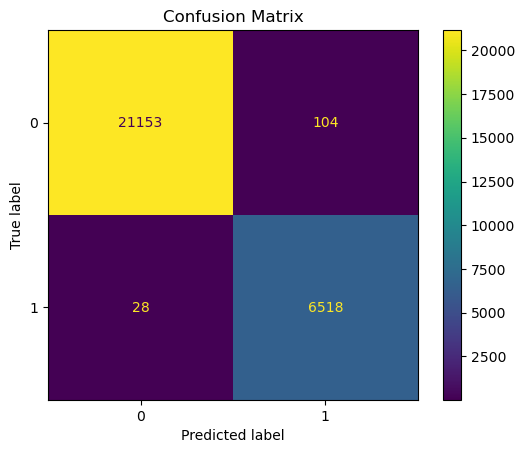

In [71]:
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)

disp.plot(cmap=plt.cm.viridis)
plt.title('Confusion Matrix')
plt.show()

In [72]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00     21257
        True       0.98      1.00      0.99      6546

    accuracy                           1.00     27803
   macro avg       0.99      1.00      0.99     27803
weighted avg       1.00      1.00      1.00     27803



In [79]:
pd.Series(y_pred).value_counts()

False    21181
True      6622
Name: count, dtype: int64